# Kiva Crowd-Funding Data Analysis

## Data Cleanup and Preparation

In [136]:
file = os.path.join('resource', f'kiva_loans.csv')
df = pd.read_csv(file)

original_columns = df.columns
original_columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [127]:
df.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39,2013-12-17 08:00:00,2014-01-02 10:06:32,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08,2013-12-17 08:00:00,2014-01-02 09:17:23,11.0,14,NaN,"female, female",irregular,2014-01-01


In [128]:
df.count()

id                    671205
funded_amount         671205
loan_amount           671205
activity              671205
sector                671205
use                   666977
country_code          671197
country               671205
region                614405
currency              671205
partner_id            657698
posted_time           671205
disbursed_time        668809
funded_time           622874
term_in_months        671205
lender_count          671205
tags                  499789
borrower_genders      666984
repayment_interval    671205
date                  671205
dtype: int64

In [123]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


## Convert the date to timestamp

In [124]:
time_columns = ['posted_time', 'disbursed_time', 'funded_time', 'date']
df.loc[:, time_columns] = df[time_columns].apply(pd.to_datetime)

## Clean Up Gender

In [130]:
df.borrower_genders.value_counts()

female                                                                                                                                                                                                                                                                                                                                                      426502
male                                                                                                                                                                                                                                                                                                                                                        134710
female, female                                                                                                                                                                                                                                                                                    

In [132]:
from collections import Counter
def normalize_gender(borrower_genders):
    if isinstance(borrower_genders, str):
        return Counter(
            map(
                lambda x: x.replace(' ', ''),
                borrower_genders.split(', ')
            )
        ).most_common(1)[0][0]
    else:
        return borrower_genders
df.loc[:, 'gender'] = df['borrower_genders'].apply(normalize_gender)

In [134]:
df.gender.value_counts()

female    517592
male      149392
Name: gender, dtype: int64

### Take a Sample for Development

In [10]:
df.sampleple(1000).to_csv(os.path.join('resource', 'kiva_loans_sample.csv')

## Create a Python module to encapsulate the data clean up process for all other notbookes


# Data Exploring

## Histogram

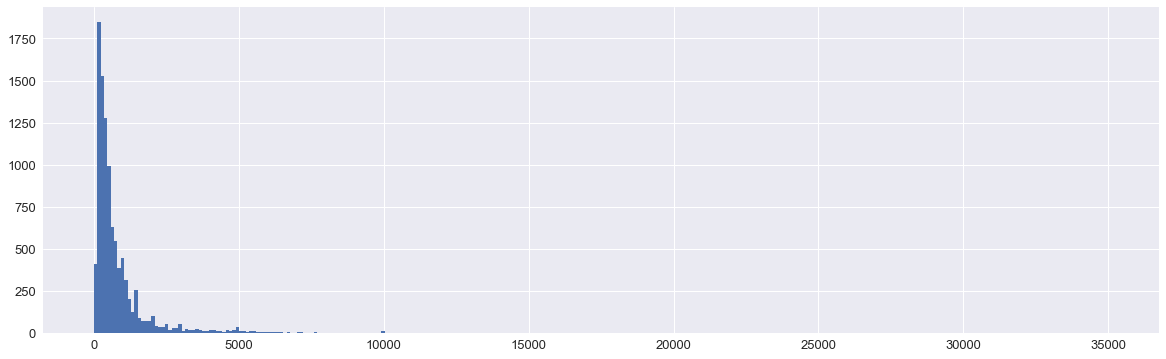

In [11]:
figure, ax = plt.subplots(figsize=(20,6))
df.reset_index()['funded_amount'].hist(
    bins=300,
    ax=ax
)
plt.show()

## Boxplot

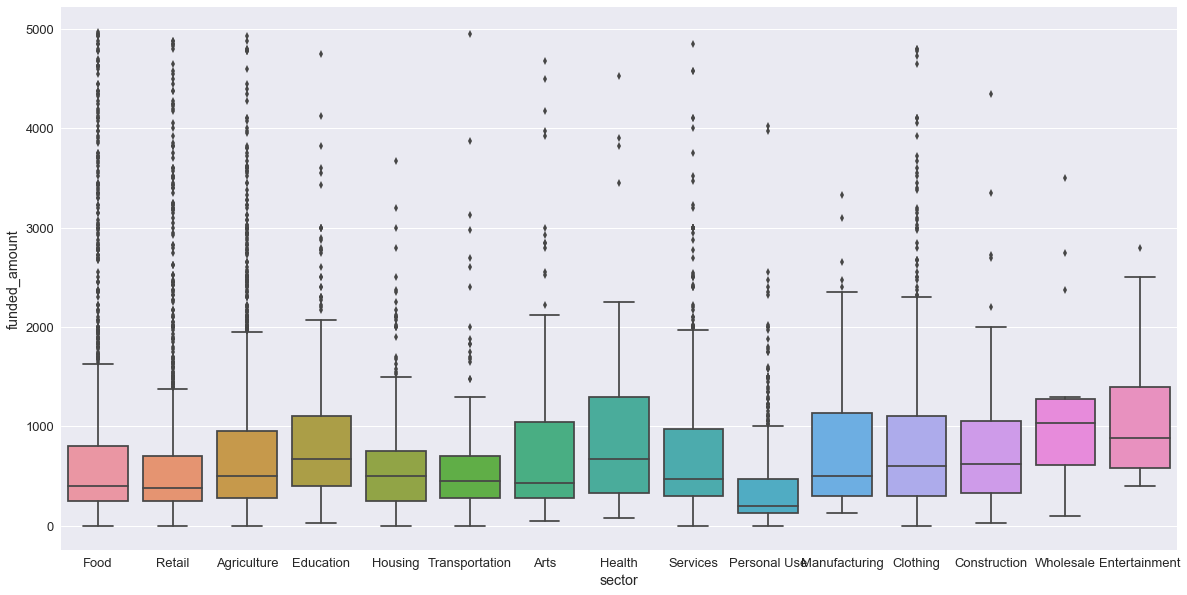

In [114]:
figure, ax = plt.subplots(figsize=(20,10))

sns.boxplot(
    x='sector', 
    y='funded_amount',
    #orient="h",
    data=df[df['funded_amount'] < 5000])
plt.show()

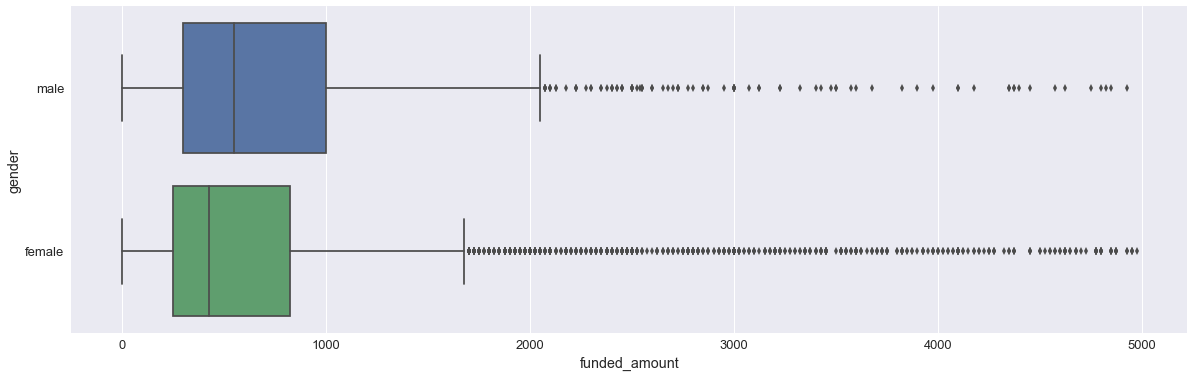

In [115]:
figure, ax = plt.subplots(figsize=(20,6))

sns.boxplot(
    y='gender', 
    x='funded_amount', 
    orient='h',
    data=df[df['funded_amount'] < 5000])
plt.show()

## Voilin Plot

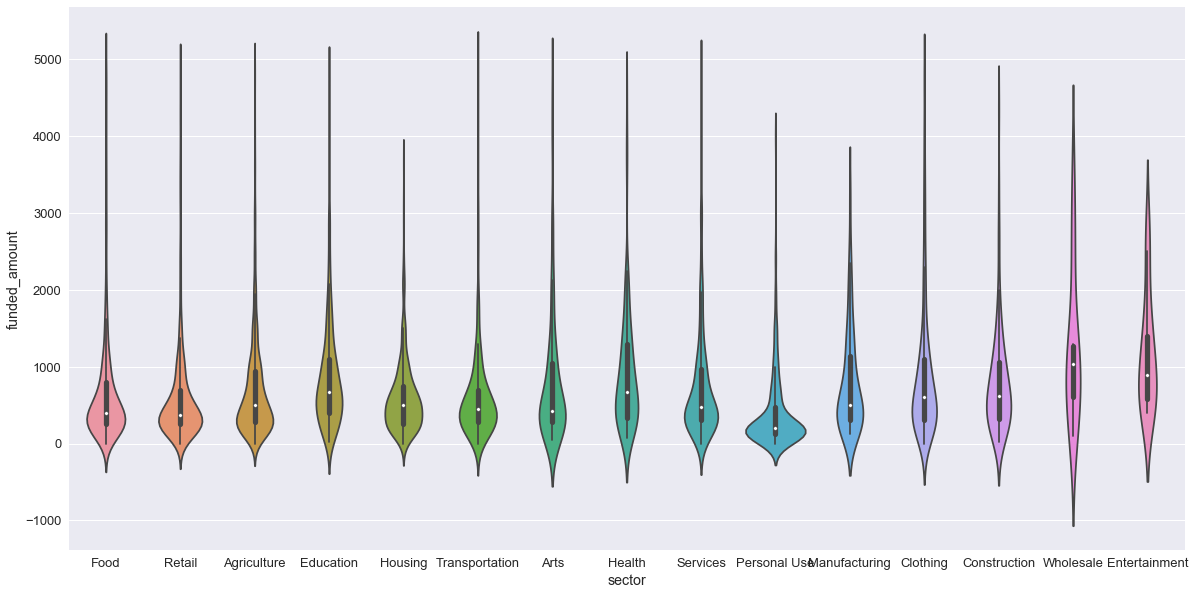

In [116]:
figure, ax = plt.subplots(figsize=(20,10))

sns.violinplot(
    x='sector',
    y='funded_amount',
    data=df[df['funded_amount'] < 5000]
)
plt.show()

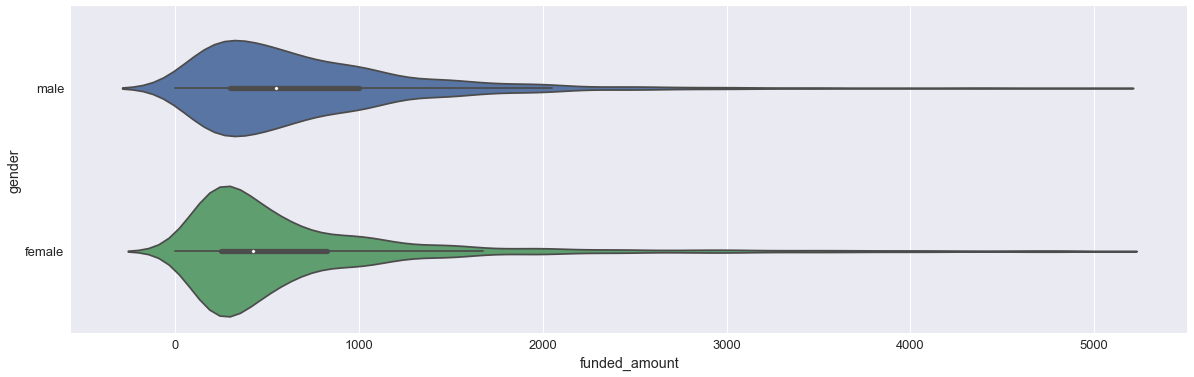

In [117]:
figure, ax = plt.subplots(figsize=(20,6))

sns.violinplot(
    y='gender', 
    x='funded_amount', 
    orient='h',
    data=df[df['funded_amount'] < 5000])
plt.show()

## Number loans ranked by country

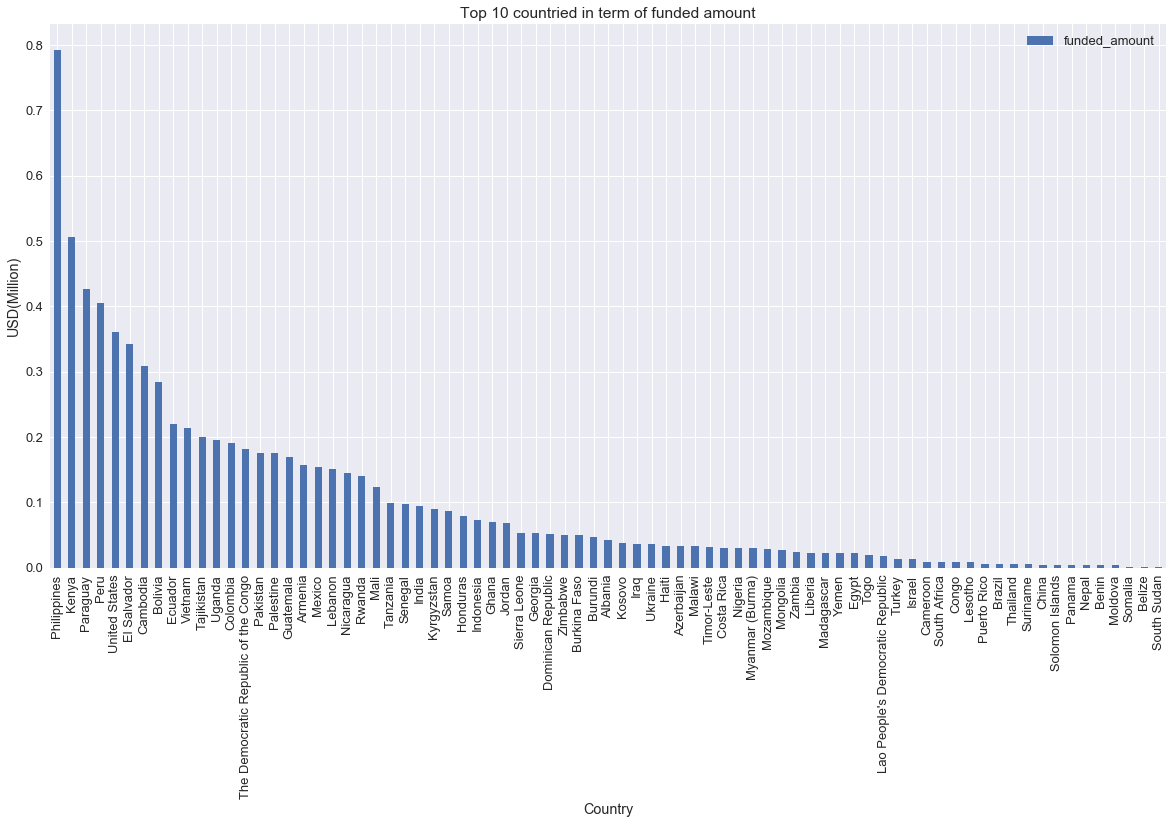

In [74]:
figure, ax = plt.subplots(figsize=(20,10))
( df.groupby('country')[['funded_amount']].sum() / (1000 * 1000 ) ).sort_values(
    by='funded_amount', ascending=False).plot.bar(
    ax=ax,
)
plt.xlabel('Country')
plt.ylabel('USD(Million)')
plt.title('Top 10 countried in term of funded amount')
plt.show()

In [89]:
(df.groupby(
       ['country', 'gender']
    )[['funded_amount']].sum() / (1000 * 1000 )).sort_values(
        by='funded_amount', ascending=False).head(10).reset_index()

,country,gender,funded_amount
0,Philippines,female,0.731475
1,Paraguay,female,0.388825
2,Kenya,female,0.372180
3,Peru,female,0.315125
4,Cambodia,female,0.264375
5,Bolivia,female,0.216825
6,Vietnam,female,0.209350
7,United States,female,0.198860
8,El Salvador,female,0.191050
9,Ecuador,female,0.182200


## Stacked Bar showing How Loan Distributed Amount Genders per Country

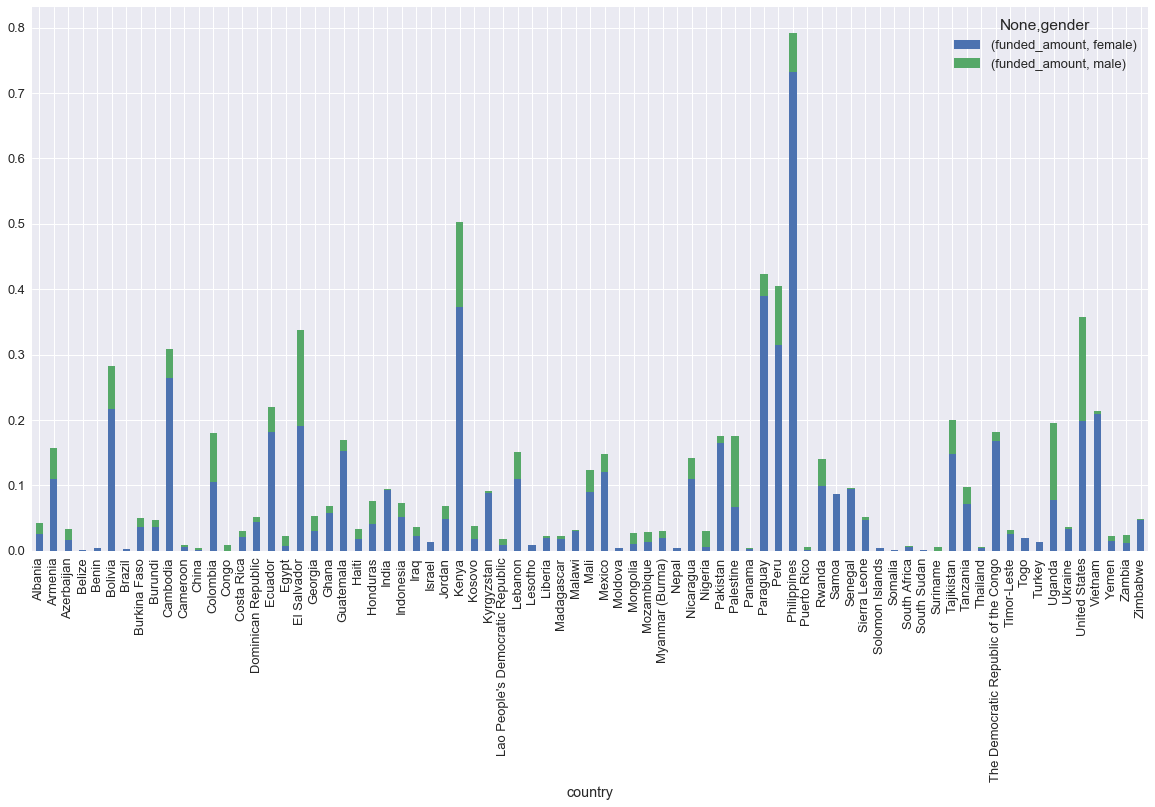

In [111]:
figure, ax = plt.subplots(figsize=(20,10))
(df.groupby(
       ['country', 'gender']
    )[['funded_amount']].sum() / (1000 * 1000 )).reset_index().pivot(
    index='country', columns='gender'
).plot.bar(
    stacked=True,
    ax=ax
)
plt.show()

In [76]:
## Median Loan Amount Ranking

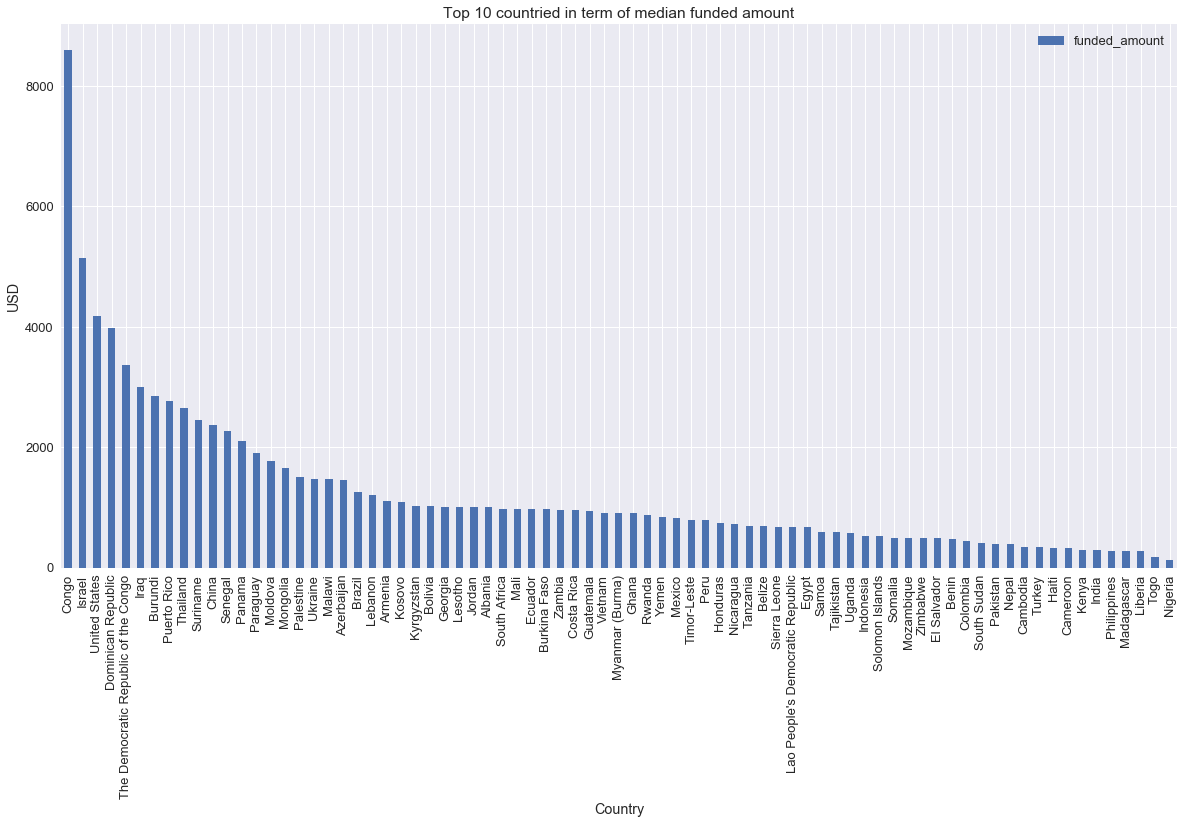

In [75]:
figure, ax = plt.subplots(figsize=(20,10))
( df.groupby('country')[['funded_amount']].median() ).sort_values(
    by='funded_amount', ascending=False).plot.bar(
    ax=ax,
)
plt.xlabel('Country')
plt.ylabel('USD')
plt.title('Top 10 countried in term of median funded amount')
plt.show()

## GDP vs Median Funded Amount

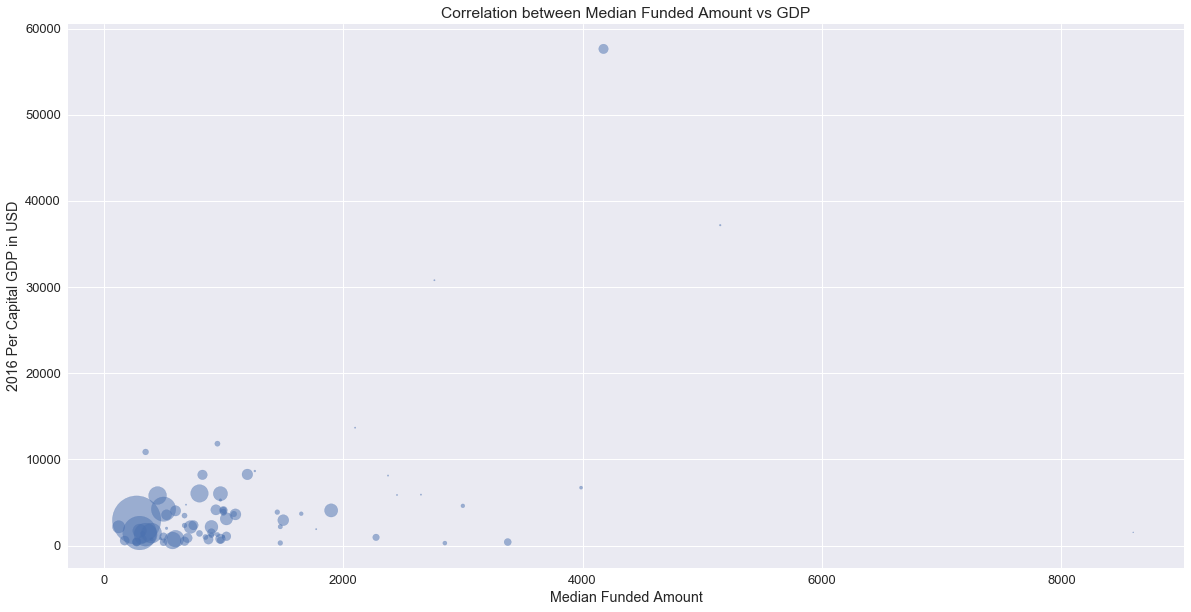

In [19]:
import wbdata
import numpy as np
import pandas as pd
gdp_lookup = {}
for country_code in df.country_code.unique():
    gdp_lookup[country_code] = wbdata.get_data("NY.GDP.PCAP.CD", country=(country_code))[1]['value']

median_by_country = df.groupby('country_code')[['funded_amount']].median()
median_by_country
for country_code in median_by_country.index:
    median_by_country.loc[country_code, 'gdp'] = pd.to_numeric(gdp_lookup[country_code])

count_by_country = df.groupby('country_code')[['funded_amount']].count().rename(
    columns={'funded_amount': 'loan_count'}
)
median_by_country = median_by_country.join(count_by_country)

figure, ax = plt.subplots(figsize=(20,10))
median_by_country.plot.scatter(
    x='funded_amount',
    y = 'gdp',
    s = median_by_country['loan_count'],
    ax=ax,
    alpha=0.5,
)

plt.xlabel('Median Funded Amount')
plt.ylabel('2016 Per Capital GDP in USD')
plt.title('Correlation between Median Funded Amount vs GDP')
plt.show()

### Narrow down to GDP < 20000, and Median Funded Amount < 4000

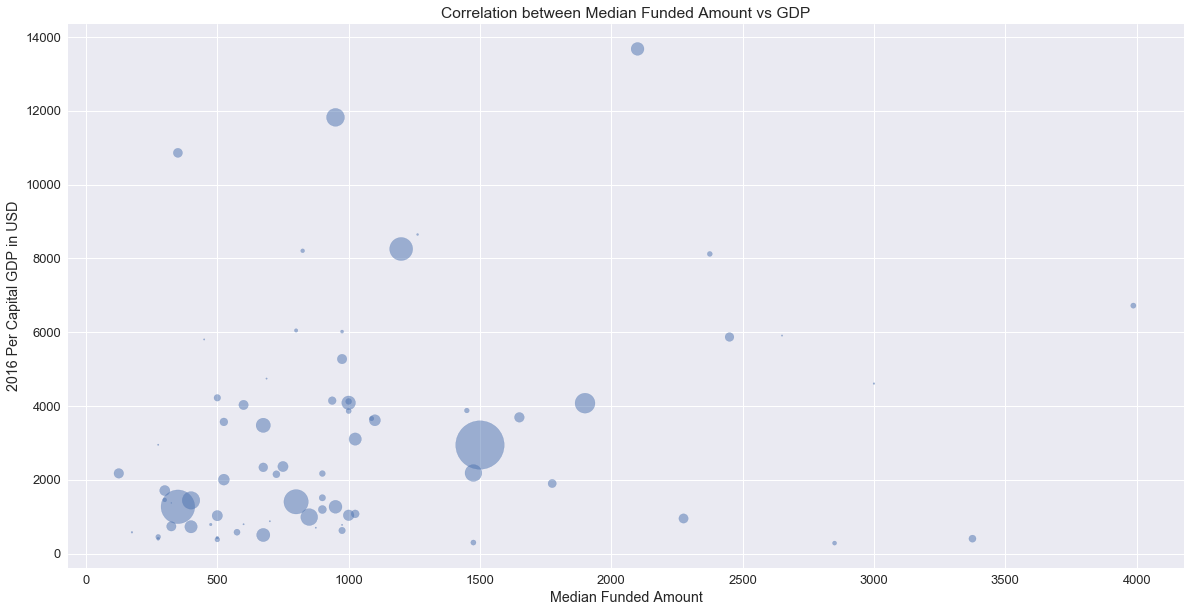

In [20]:
figure, ax = plt.subplots(figsize=(20,10))
median_by_country.query(
    'gdp < 20000 & funded_amount < 4000'
).plot.scatter(
    x='funded_amount',
    y = 'gdp',
    s = median_by_country['loan_count'],
    ax=ax,
    alpha=0.5,
)

plt.xlabel('Median Funded Amount')
plt.ylabel('2016 Per Capital GDP in USD')
plt.title('Correlation between Median Funded Amount vs GDP')
plt.show()

## Gender

In [21]:

median_by_country = df.groupby(['country_code', 'gender'])[['funded_amount']].median().reset_index()

median_by_country.loc[:, 'gdp'] = median_by_country['country_code'].map(
    lambda x: pd.to_numeric(gdp_lookup[x])
)

In [22]:
median_by_country = median_by_country.set_index(['country_code', 'gender'])


In [23]:
count_by_country = df.groupby(['country_code', 'gender'])[['funded_amount']].count().rename(
    columns={'funded_amount': 'loan_count'}
)
median_by_country = median_by_country.join(count_by_country).reset_index()

In [24]:
median_by_country.head()

,country_code,gender,funded_amount,gdp,loan_count
0,AL,female,1000.0,4124.982390,21
1,AL,male,1000.0,4124.982390,14
2,AM,female,1425.0,3614.688357,77
3,AM,male,850.0,3614.688357,47
4,AZ,female,1600.0,3878.709257,10


In [25]:
median_by_country[
    median_by_country['gender'] == 'male'
].head()

,country_code,gender,funded_amount,gdp,loan_count
1,AL,male,1000.0,4124.982390,14
3,AM,male,850.0,3614.688357,47
5,AZ,male,1250.0,3878.709257,13
7,BF,male,975.0,627.103079,13
9,BI,male,3125.0,285.727442,4


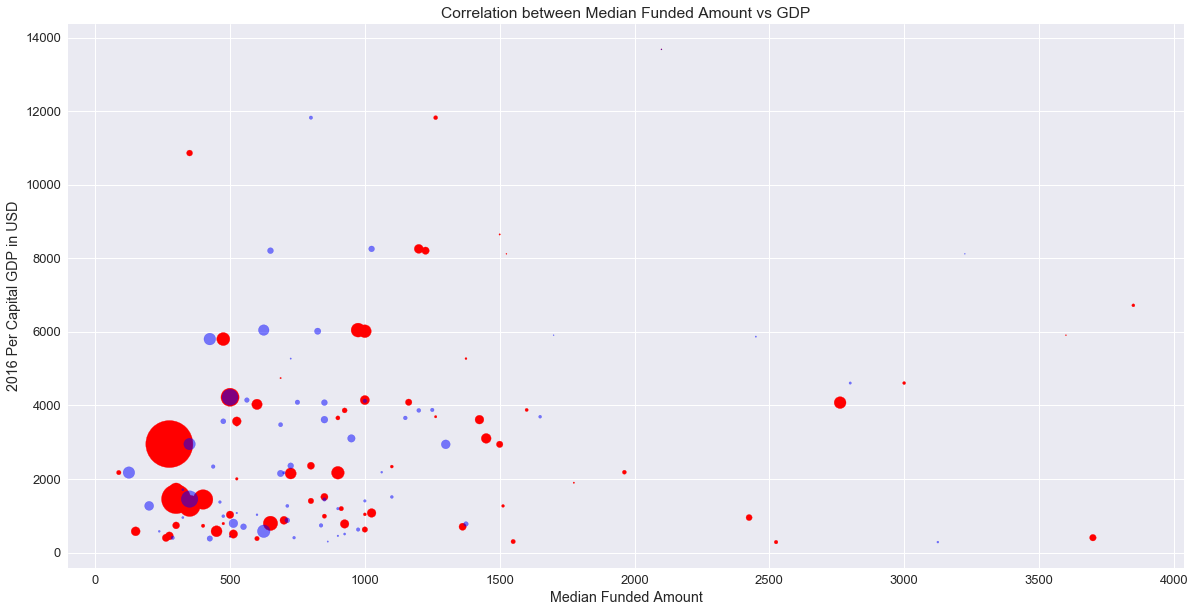

In [28]:
figure, ax = plt.subplots(figsize=(20,10))

median_by_country = median_by_country.query('gdp < 20000 & funded_amount < 4000')
female_df = median_by_country[
    median_by_country['gender'] == 'female'
]

female_df.plot.scatter(
    x='funded_amount',
    y='gdp',
    color='red',
    s = female_df['loan_count'],
    ax=ax
)

male_df = median_by_country[
    median_by_country['gender'] == 'male'
]

male_df.plot.scatter(
    x='funded_amount',
    y='gdp',
    color='blue',
    s = male_df['loan_count'],
    ax=ax,
    alpha=0.5
)

plt.xlabel('Median Funded Amount')
plt.ylabel('2016 Per Capital GDP in USD')
plt.title('Correlation between Median Funded Amount vs GDP')
plt.show()

### Narrow down to GDP < 20000, and Median Funded Amount < 4000

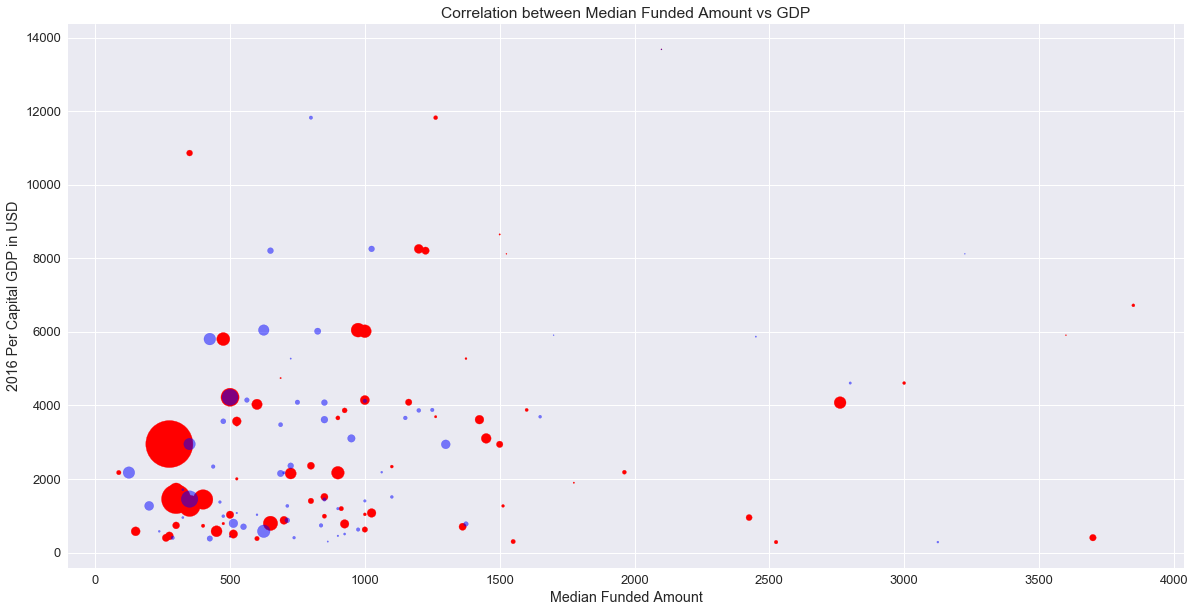

In [29]:
figure, ax = plt.subplots(figsize=(20,10))

female_df = median_by_country[
    median_by_country['gender'] == 'female'
]

female_df.plot.scatter(
    x='funded_amount',
    y='gdp',
    color='red',
    s = female_df['loan_count'],
    ax=ax
)

male_df = median_by_country[
    median_by_country['gender'] == 'male'
]

male_df.plot.scatter(
    x='funded_amount',
    y='gdp',
    color='blue',
    s = male_df['loan_count'],
    ax=ax,
    alpha=0.5
)

plt.xlabel('Median Funded Amount')
plt.ylabel('2016 Per Capital GDP in USD')
plt.title('Correlation between Median Funded Amount vs GDP')
plt.show()